# Law of Large Numbers Investigation


In this assignment we will do some investigation into the law of large numbers.  This will give us a nice chance to practice using scipy to generate sequences of random numbers from various distributions, and use matplotlib to display the results of our investigations.  These two tools will be with us for the rest of the course, so it's a good idea to spend a bit of time using them in a comfortable scenario.


## The Law of Large Numbers

Recall that the law of large numbers is our first example of a mathematical link between a population and a sample from that population.  It (approximately) states that in large samples, the mean of the sample is close to the expected value of the population from which the sample was drawn.



In [3]:
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

## Part 1: Coin Flips

Let's validate that the law of large numbers holds for coin flips and dice, which is the original context where [Gerolamo Cardano](https://en.wikipedia.org/wiki/Gerolamo_Cardano) discovered the law.

Since the results of coin flips are *not* numeric, we will need to make some convention to encode heads and tails as numeric values.  The traditional choice is `HEADS => 1, TAILS => 0`.

We can then flip a fair coin ten times using `scipy.stats` (which we imported under the name `stats`):

In [4]:
stats.binom(n=1, p=0.5).rvs(10)

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1])


By a **fair** coin, we mean a coin with equal chance of landing heads or tails.  Below, we will refer to the probability of a coin landing heads as the **fairness** of the coin.

1\. Write a coin flipping function which flips *any* coin (may be unfair) a specified number of times.  Your function signature should look like this:

In [82]:
def flip_coin(n_flips, p=0.5):
    return stats.binom(n=1, p=p).rvs(int(n_flips))

2\. Flip a fair coin 1000 times with your function.  What will the sample average of these flips be and why?  Use `np.mean` to check.

In [13]:
np.mean(flip_coin(1000, p=0.5))

0.516

3\. Flip an **unfair** coin 1000 times.  What will the sample average be now?  How would you expect the answer to change depending on how extreme the unfairness is?  Use `np.mean` to check your result.

In [14]:
np.mean(flip_coin(1000, p=0.9))
# increases the probablity that a heads will be flipped

0.893

In [57]:
def flip_range(starting=10, ending=1000, steping=10):
    flip_samples = []
    for value in list(range(starting,ending,steping)):
        flip_samples.append(np.mean(flip_coin(value)))
    return flip_samples


In [58]:
flip_range()

[0.4,
 0.45,
 0.5333333333333333,
 0.525,
 0.4,
 0.4666666666666667,
 0.4857142857142857,
 0.45,
 0.4888888888888889,
 0.5,
 0.509090909090909,
 0.45,
 0.47692307692307695,
 0.45714285714285713,
 0.5466666666666666,
 0.4875,
 0.5117647058823529,
 0.5166666666666667,
 0.5157894736842106,
 0.5,
 0.45714285714285713,
 0.509090909090909,
 0.4956521739130435,
 0.5125,
 0.488,
 0.5115384615384615,
 0.4777777777777778,
 0.49642857142857144,
 0.49310344827586206,
 0.5233333333333333,
 0.49032258064516127,
 0.503125,
 0.4636363636363636,
 0.4647058823529412,
 0.49142857142857144,
 0.4777777777777778,
 0.4864864864864865,
 0.5368421052631579,
 0.5435897435897435,
 0.4975,
 0.48292682926829267,
 0.5119047619047619,
 0.5232558139534884,
 0.5318181818181819,
 0.52,
 0.5065217391304347,
 0.4808510638297872,
 0.49375,
 0.5081632653061224,
 0.494,
 0.49019607843137253,
 0.5173076923076924,
 0.5113207547169811,
 0.5,
 0.48727272727272725,
 0.5053571428571428,
 0.5210526315789473,
 0.46206896551724136,


5. You're probably feeling like looking at a list of one-hundred numbers is not so illuminating, so plot them! Make a line plot where the x-axis shows the sample size, and the y-axis show the sample mean. Also include a horizontal line for the population value of the expectation.

Text(0.5, 0, 'Sample Size')

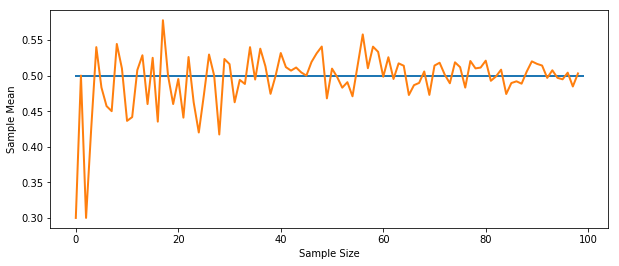

In [85]:
fig, ax = plt.subplots(1, figsize=(10, 4))
ax.plot(np.repeat(0.5, len(flip_coin(100))), linewidth=2)
ax.plot(flip_range(), linewidth=2)
ax.set_ylabel('Sample Mean')
ax.set_xlabel('Sample Size')

In [69]:
for i in range(100):
    sample = flip_range()
    ax.plot(sample, linewidth=2)

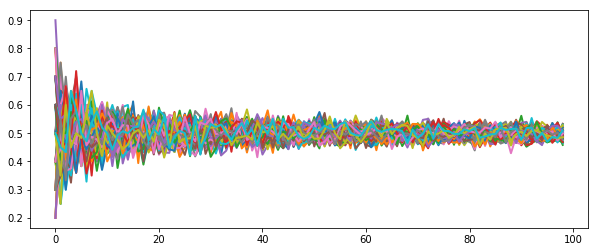

In [70]:
fig, ax = plt.subplots(1, figsize=(10, 4), sharex=True, sharey=True)

for i in range(100):
    sample = flip_range()
    ax.plot(sample, linewidth=2)

7\. Finally, let's explore what happens when we change the fairness of the coin.  Use subplots to draw the same picture as the above, but for different values of the coin fairness (I suggest 0.1, 0.25, 0.5, 0.75 and 0.9).  This may take a few seconds to run!


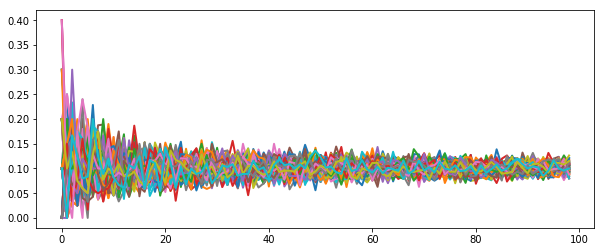

In [86]:
# p = 0.1

def flip_coin(n_flips, p=0.1):
    return stats.binom(n=1, p=p).rvs(int(n_flips))

def flip_range(starting=10, ending=1000, steping=10):
    flip_samples = []
    for value in list(range(starting,ending,steping)):
        flip_samples.append(np.mean(flip_coin(value)))
    return flip_samples

fig, ax = plt.subplots(1, figsize=(10, 4), sharex=True, sharey=True)

for i in range(100):
    sample = flip_range()
    ax.plot(sample, linewidth=2)

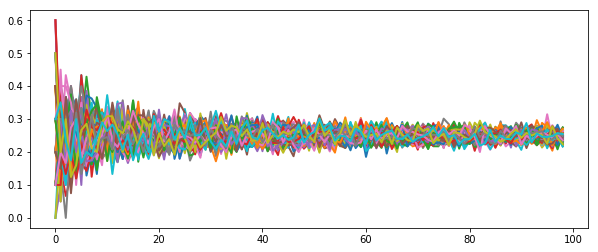

In [87]:
def flip_coin(n_flips, p=0.25):
    return stats.binom(n=1, p=p).rvs(int(n_flips))

def flip_range(starting=10, ending=1000, steping=10):
    flip_samples = []
    for value in list(range(starting,ending,steping)):
        flip_samples.append(np.mean(flip_coin(value)))
    return flip_samples

fig, ax = plt.subplots(1, figsize=(10, 4), sharex=True, sharey=True)

for i in range(100):
    sample = flip_range()
    ax.plot(sample, linewidth=2)

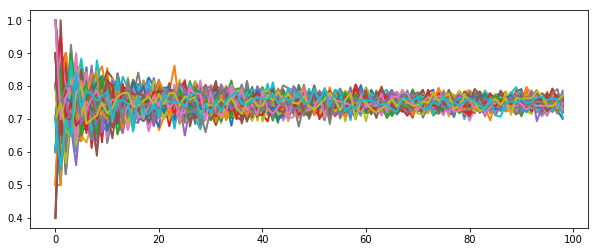

In [88]:
def flip_coin(n_flips, p=0.75):
    return stats.binom(n=1, p=p).rvs(int(n_flips))

def flip_range(starting=10, ending=1000, steping=10):
    flip_samples = []
    for value in list(range(starting,ending,steping)):
        flip_samples.append(np.mean(flip_coin(value)))
    return flip_samples

fig, ax = plt.subplots(1, figsize=(10, 4), sharex=True, sharey=True)

for i in range(100):
    sample = flip_range()
    ax.plot(sample, linewidth=2)

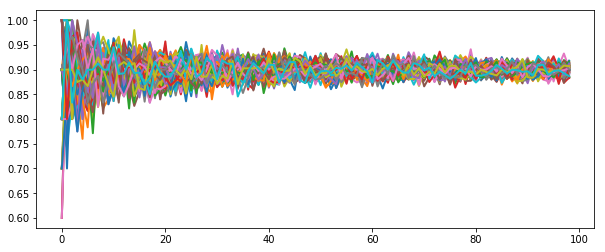

In [89]:
def flip_coin(n_flips, p=0.9):
    return stats.binom(n=1, p=p).rvs(int(n_flips))

def flip_range(starting=10, ending=1000, steping=10):
    flip_samples = []
    for value in list(range(starting,ending,steping)):
        flip_samples.append(np.mean(flip_coin(value)))
    return flip_samples

fig, ax = plt.subplots(1, figsize=(10, 4), sharex=True, sharey=True)

for i in range(100):
    sample = flip_range()
    ax.plot(sample, linewidth=2)

8\. You should notice that the width of the bands is greater for fair coins compared to very unfair coins.  This makes sense, for a fair coin the result of the flips is maximally inconsistent, where very unfair coins tend to give the same result often.

In [124]:
def flip_coin(n_flips=100, p=0.5):
    return stats.binom(n=1, p=p).rvs(int(n_flips))

In [144]:
def test_flip():
    mean_list = []
    for i in fairnesses:
        for j in range(100):
            sample = np.mean(flip_coin(p=i))
            mean_list.append(sample)
    return mean_list

In [146]:
fairnesses = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [145]:
test_flip()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.14,
 0.05,
 0.1,
 0.09,
 0.11,
 0.08,
 0.11,
 0.13,
 0.08,
 0.1,
 0.14,
 0.07,
 0.1,
 0.1,
 0.12,
 0.14,
 0.08,
 0.08,
 0.08,
 0.11,
 0.09,
 0.1,
 0.08,
 0.08,
 0.06,
 0.06,
 0.1,
 0.09,
 0.08,
 0.09,
 0.11,
 0.15,
 0.1,
 0.09,
 0.11,
 0.11,
 0.05,
 0.09,
 0.08,
 0.09,
 0.1,
 0.1,
 0.1,
 0.17,
 0.12,
 0.1,
 0.15,
 0.13,
 0.07,
 0.13,
 0.05,
 0.07,
 0.16,
 0.08,
 0.15,
 0.13,
 0.09,
 0.06,
 0.05

In [ ]:
# flip coin 100 times for each p, find mean for each p, repeat 100 times
